<a href="https://colab.research.google.com/github/gusper01/seminarioITBA/blob/gh-pages/seminarioITBA_PIPELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuración SPARK en COLAB**

In [1]:
#Se debe instalar JVM para usar spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os # libreria de manejo del sistema operativo
os.system("wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz")
os.system("tar xf /spark-2.4.5-bin-hadoop2.7.tgz")
# instalar pyspark
!pip install -q pyspark
# cargar data de prediccion (Generada en el colab de EDA)
# https://github.com/gusper01/seminarioITBA/blob/gh-pages/seminarioITBA_EDA.ipynb
os.system("wget -q https://raw.githubusercontent.com/gusper01/seminarioITBA/gh-pages/data/datatotal01102021v1.csv")

     |████████████████████████████████| 212.4 MB 55 kB/s 
     |████████████████████████████████| 198 kB 56.5 MB/s 


0

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("SeminarioITBA")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [3]:
spark

# **Creación Dataframe Spark con data de ML**

In [4]:
#pipeline_proc = "https://raw.githubusercontent.com/gusper01/seminarioITBA/gh-pages/data/datatotal01102021v.csv"
# Continuacion del Pipelie: Se genera Dataframe de Spark desde el dataset con la predicción producto del proceso
# de modelado de ML (se trae desde GITHUB )
p = "datatotal01102021v1.csv"
df_spark = spark.read.csv(p, header=True, inferSchema=True)


In [6]:
df_spark.printSchema()

root
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: double (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- Exterior2nd: string (nullable = tr

In [7]:
# Visualizar Dataframe Spark
df_spark.show()

+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+-----------+----+---------+
|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|

Se observa que en el esquema 
Algunos datos con tipos erroneos 
GarageYrBlt: double  valor de ejemplo "2005.0" Año 
GarageCars: double valor de ejemplo "2.0" Cantidad entera

In [67]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
import pandas as pd

df_spark = df_spark.withColumn("GarageYrBlt",F.col("GarageYrBlt").cast(IntegerType()))
df_spark = df_spark.withColumn("YearBuilt",F.col("YearBuilt").cast(IntegerType()))
df_spark = df_spark.withColumn("YearRemodAdd",F.col("YearRemodAdd").cast(IntegerType()))
df_spark = df_spark.withColumn("YrSold",F.col("YrSold").cast(IntegerType()))
df_spark = df_spark.withColumn("GarageCars",F.col("GarageCars").cast(IntegerType()))

dbl_cols = [f for f in df_spark.schema.fields if isinstance(f.dataType, IntegerType)]
#print(dbl_cols)
df_spark.printSchema()

root
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: double (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- Exterior2nd: string (nullable = tr

# **Persistencia**
Generación de Archivo Parquet

In [68]:
# Se genera   Archivo Parquet
df_parquet = df_spark.write.parquet("/tmp/datatotal01102021D.parquet")


In [69]:
# Consultas SQL sobre Archivo Parquet 
df_parquet_read = spark.read.parquet("/tmp/datatotal01102021D.parquet")
df_parquet_read.createOrReplaceTempView("propiedades")
spark.sql("select count(Id) from propiedades").show()

+---------+
|count(Id)|
+---------+
|     1459|
+---------+



In [76]:
spark.sql("select * from propiedades where Neighborhood = 'Gilbert'").show(truncate=False)

+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+-----------+----+----------+
|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1

In [84]:
pp = spark.sql("select * from propiedades where Neighborhood = 'Gilbert'").collect()

# **Recuperación de Datos y Visualización**

In [101]:
# Recupero los resultados de la consulta SQL en la tabla parquet parquet y la transformo en dataframe PANDAS
dataSparkParquet = pd.DataFrame(pp)
dataSparkParquet.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,60,RL,74.0,13830,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,...,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482.0,TA,TA,Y,212,34,0,0,0,0,NONE,MnPrv,NONE,0,3,2010,WD,Normal,1525.0,1463,10.488520
1,60,RL,78.0,9978,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,...,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470.0,TA,TA,Y,360,36,0,0,0,0,NONE,NONE,NONE,0,6,2010,WD,Normal,1525.0,1464,10.488248
2,60,RL,75.0,10000,Pave,NONE,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,...,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993,Fin,2,440.0,TA,TA,Y,157,84,0,0,0,0,NONE,NONE,NONE,0,4,2010,WD,Normal,1525.0,1466,10.489756
3,20,RL,68.0,7980,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,...,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NONE,Attchd,1992,Fin,2,420.0,TA,TA,Y,483,21,0,0,0,0,NONE,GdPrv,Shed,500,3,2010,WD,Normal,1525.0,1467,10.489576
4,60,RL,63.0,8402,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,...,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998,Fin,2,393.0,TA,TA,Y,0,75,0,0,0,0,NONE,NONE,NONE,0,5,2010,WD,Normal,1525.0,1468,10.489756


In [108]:
# Traigo los nombres de columnas del dataframe original
db2_cols = [f for f in df_spark.columns]
#Agrego los nombres originales
dataSparkParquet.columns = db2_cols
dataSparkParquet.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MedNhbdArea,Id,SalePrice
0,60,RL,74.0,13830,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,...,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482.0,TA,TA,Y,212,34,0,0,0,0,NONE,MnPrv,NONE,0,3,2010,WD,Normal,1525.0,1463,10.488520
1,60,RL,78.0,9978,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,...,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470.0,TA,TA,Y,360,36,0,0,0,0,NONE,NONE,NONE,0,6,2010,WD,Normal,1525.0,1464,10.488248
2,60,RL,75.0,10000,Pave,NONE,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,...,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993,Fin,2,440.0,TA,TA,Y,157,84,0,0,0,0,NONE,NONE,NONE,0,4,2010,WD,Normal,1525.0,1466,10.489756
3,20,RL,68.0,7980,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,...,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NONE,Attchd,1992,Fin,2,420.0,TA,TA,Y,483,21,0,0,0,0,NONE,GdPrv,Shed,500,3,2010,WD,Normal,1525.0,1467,10.489576
4,60,RL,63.0,8402,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,...,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998,Fin,2,393.0,TA,TA,Y,0,75,0,0,0,0,NONE,NONE,NONE,0,5,2010,WD,Normal,1525.0,1468,10.489756


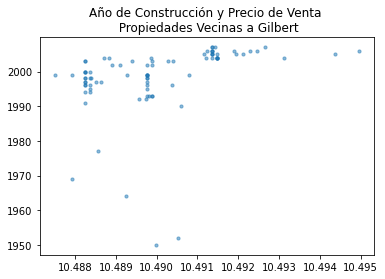

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.animation as animation

prop_groups = dataSparkParquet.groupby('YearBuilt')
prop_groups_prom = prop_groups.mean()
dataN = dataSparkParquet.select_dtypes(include=[np.number])
dataC = dataSparkParquet.select_dtypes(include=[object])
#data = dataSparkParquet

#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = dataN.columns
values = dataN.values

N = 50
x = dataSparkParquet["SalePrice"]
y = dataSparkParquet["YearBuilt"]
colors = np.random.rand(N)
#area = (15 * np.random.rand(N))**2  # 0 to 15 point radii
area = 10
plt.scatter(x, y, s=area, alpha=0.5)
plt.title("Año de Construcción y Precio de Venta \n Propiedades Vecinas a Gilbert")
plt.show()